# Lesson 2: Preparing the data 
No one wants to spend time on manually looking at the data, but please do. Remember: "*Garbage in, Garbage out*" - And we don't want that!

Before feeding your data to a ML algorithm, you need to preprocess the data.

## Acquire data
The steps of acquiring data:
    
1) Decide the features that are potentially benefical for the task
- In classical machine learning, all data points must contain all features. No missing "cells" (features for data points) are allowed in data set. There are ways to fill in (impute) the missing data, but it needs to be considered carefully, and it may not be useful to select features with a high proportion of missing data. (More about this below.)

2) For supervised learning, make sure the labels are there
- For example, to infer plankton taxa from measurements (classification task), someone must first identify a large number of individuals to serve as the training data
- This might be expensive as a human often needs to do the work. This step requires time and please, be careful! Even the best model is only as good as the data you have fed to it - you don't want to make mistakes here!


### How much data is enough?

There is no correct answer for this - it depends on the quality of the data, complexity of the task, and number of features. Usually more is better: 100 data points for really simple tasks, 1000 data points for simple tasks and 10000 data points for complex tasks.

Many real-life phenomena are riddled by what is called the long tail. It means that while some values are very common, most values are rare. Think, as an example, of words in newspapers: words such as “and”, “if”, and “he” are very common, but there is an extremely high number of words that occur only very rarely (“serendipity”, “bibliophile”). This means that even with a large data set, there may be very little data on the rare, perhaps most interesting, values, species, etc.

*Please note:*

Humans get biased really easily. We learn what we see. In order to stay unbiased, we shouldn't filter the data we see. The same applies to algorithms. Pay attention to not being selective or biased when collecting data.

For more on what happens if data is biased, see this post on [racist twitter algorithm](https://www.boredpanda.com/twitter-image-centering-algorithm-racist/) that went viral on 2020. Oops! You don't want your machine learning algorithm to be racist, huh?

## Pre process data

Some algorithms are bad at handling different data, and that is why data usually needs to be preprocessed or "pre-chewed" for the algorithm. This might include one or several of the following:

For more details see [link](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825)


### Remove mistakes - if you can
Data is full of mistakes. Mistakes can be caused by humans or machine. 
- Human made mistakes are usually typos as it's surprisingly easy to input "0.001" instead of "0.01" or "180m" instead of "180cm". 
- Machine made mistakes are for example caused by faulty sensors

Some models are bad with mistakes. Humans usually don't get distracted by mistakes. If you see a record of adult heights, you instantly see that 180m must be mistake as the rest of the data probably lies between 150cm and 200cm. However, if an algorithm sees the same record, it might get super confused and somehow try to explain the oddity.

Removing mistakes is hard for large datasets. Also, usually different people collect and analyse the data so the one analyzing the data might not even be able to tell if a value is a mistake. It is usually easy to spot the most crude mistakes by visualizations. We will soon show how.

### Remove missing values - if you want and can affort it
Data is not perfect, it has holes: missing values. This means that for data and measurement specific reasons, not all features are available for all data points. On the other hand, many algorithms are built not to allow missing values.

There are different ways of representing missing data, *find out how missing data is marked in your case*. Some data uses a specific number, e.g. "-99", "99" or "999" to mark missing numbers and some data marks it with "blank" or "Not-A-Number". 

If data is missing, there are two possible approaches:
- Removing data points with missing features: This is usually a good approach if there are plenty of data. Removing data points with missing values can induce bias as the missingess of features might not be a random phenomenon. If one decides to remove data, one must consider if this induces bias and if it is acceptable in the application the data is used for. You can also consider removing features with particularly many missing values. This may not be desireable if the feature is one that is expected to be important in the prediction task. 
- Filling the missing values with some heuristic: The most simple heuristic is to use the median/mean of the missing feature. All inputation strategies induce bias and its effects might be more severe for extremely sparse data. It is also possible to use more complex heuristic for inputation. For instance as temperature and time of the year are correlated, missing temperature values can e.g. be inputed with the mean of the month.

The below image illustrated the two possible strategies:
<img src="img/missing_data.jpg" width="600"/>

### Represent your data as numbers
Computers love numbers but unfortunately data is not always numbers. Especially categorical variables are troublesome and should be represented as numbers.

The easiest ones are nominal or ordinal variables with only two options (yes/no, available/not available, bad/good etc...). They can simply be replaced by 1 and 0 so that e.g. all "yes" are replaced with 1 and all "no" are replaced with 0. Simple! 

Nominal variables with more than two options are usually represented as so called "one-hot"-vectors. For instance, if there are three different categories (A, B and C), we represent the category with three separate binary variables so that only one of them can be one. The below image clarifies how this is done: 
<img src="img/data-binary.jpg" width="500"/>

For ordinal variables with multiple options, it is also possible to replace different options by integers. This way the order is retained. However, this is always not a good idea since different options might not have same distance. For example if the options are "bad", "good" and "excellent", the difference between "bad" and "good" is  larger than between "good" and "excellent".

Also, some variables, for instance time of year, are periodic and can thus cause problems. For instance months and weekdays are periodic in nature: The distance between December and January should be same as the distance from January to February. However, if months are presented as ordinal variables, this distance is lost. Also, if they are presented as "one-hot"-vectors this distance is lost as well. One option is to represent periodic data merely as numeric data and choose an algorithm that can handle the periodicity. We also show a "hack" below for periodic data that sometimes works surprisingly well.

In addition to changing the data, it usually is necessary to also update the metadata related to the features. For binary presentations it should be clear from the name of the feature what 1 and 0 mean. For example in the dataset illustrated in the above image there are two options for size (large and small). Since the option "large" is replaced by ones, the feature is renamed to "large".

*An advanced tip*: Always think if you can represent the features in a way that makes it as easy as possible for the algorithm to find the effects you believe the data contains. For instance in the apartment price example it might be better to represent the location of the apartment as a distance from the center of the city instead of coordinates. Another example is time; It might be benefical to represent time as separate features. For instance there might be daily effects (seen similar each day), monthly effects (seen similar each month) and  yearly variation (e.g. seasons). In economic and human behaviour there also might be a weekly trend (people behave differently on weekends). It might thus be benefical to represent time as three or four separate features.

For more details on the topic see [link](https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63)

#### A "Hack" for periodic features: spherical coordinates

If your variables are periodic (for example time of day or month), a simple way to preserve distance is to transfer the data to spherical coordiantes ([see more from wikipedia](https://en.wikipedia.org/wiki/Spherical_coordinate_system)), as illustrated below.

Mathematically, if $x \in [0,1]$, we use $(\sin(2\pi x), \cos(2 \pi x))$ instead of x in the algorithm

Text(0.5, 1.0, 'Best linear fit to unmodified data')

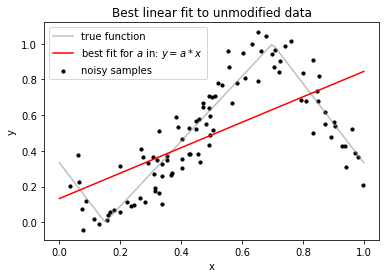

In [1]:
# The below "hack" works surprisingly well if you have periodic variables in your data
#First generate a simple periodic dummy function, you don't need to care about the details of this function
import numpy as np
import matplotlib.pyplot as plt
def periodic_dummy_function(x, x0=0.15, x1=0.7, y0=0, y1=1.0):
    k0 =(y0-y1)/(x0+(1-x1))
    b0 = y0 - x0*k0
    k1 = (y1-y0)/(x1-x0)
    b1 = y0 - x0*k1
    k2 = k0
    b2 = y1-x1*k2
    f = np.piecewise(x, [x<x0, (x>=x0) & (x<x1), x>x1], [lambda x: x*k0+b0,lambda x: x*k1+b1,lambda x: x*k2+b2 ])
    return f #-np.cos(2*np.pi*x + 0.25*np.pi)+1.0

# Then generate a noise free response from the function for the whole periodic range for plotting purposes
x_t = np.linspace(0,1,100)
y_t = periodic_dummy_function(x_t)

# Generate noisy realistic data with a single periodic feature: 
N = 100
x = np.random.uniform(0,1,N) 
y = periodic_dummy_function(x) + 0.1*np.random.normal(size=x.shape)
plt.plot(x_t,y_t, color='grey', alpha=0.5, label='true function')
plt.scatter(x, y, color='k', s=10, label='noisy samples')

# Then fit a linear function to the noisy data
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape((-1,1)), y.reshape((-1,1)))
#plt.figure()
y_pred = reg.predict(x_t.reshape((-1,1))).reshape(-1)
plt.plot(x_t, y_pred, color='red', label='best fit for $a$ in: $y = a*x$')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.title('Best linear fit to unmodified data')

Text(0.5, 1.0, 'Best linear fit to modified data')

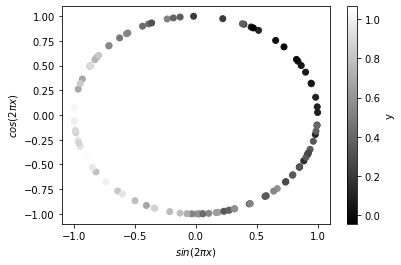

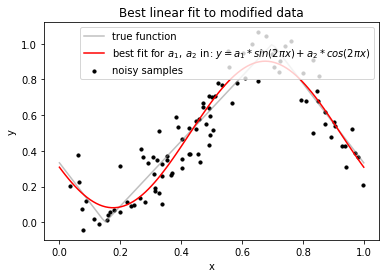

In [2]:
# Do the transformation to sin(2 \pi x), cos(2 \pi x) and visualize the data:
sin_x = np.sin(x*2*np.pi)
cos_x = np.cos(x*2*np.pi)

plt.figure()
plt.scatter(sin_x, cos_x, c=y, cmap = 'gray')
plt.xlabel('$sin(2 \pi  x)$')
plt.ylabel('$cos(2 \pi  x)$')
cbar = plt.colorbar()
cbar.set_label('y')
plt.title('')

# Visualize the linear fit for the transformed coordinates in the original domain:
reg = LinearRegression().fit(np.array([sin_x,cos_x]).T, y.reshape((-1,1)))
plt.figure()

plt.plot(x_t,y_t, color='grey', alpha=0.5, label='true function')
plt.scatter(x, y, color='k', s=10, label='noisy samples')

sin_x_t = np.sin(x_t*2*np.pi)
cos_x_t = np.cos(x_t*2*np.pi)
y_pred = reg.predict(np.array([sin_x_t,cos_x_t]).T).reshape(-1)
plt.plot(x_t,y_pred, color='red', label='best fit for $a_1,\; a_2$ in: $y = a_1*sin(2 \pi  x) + a_2*cos(2 \pi  x)$')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.title('Best linear fit to modified data')

### Balance the dataset
If the question you are interested in is predicting some rare event. For example you want to find an oil spill from satellite data or want to classify Finnish meadows based on if [Melitaea diamina](https://en.wikipedia.org/wiki/Melitaea_diamina) lives there, the data set is potentially really imbalanced. Imbalanced means that another class (no oil spill, no butterfly) is much, much more common than the other option.

In such cases the algorithms can perform well by only predicting for each data point (satellite image, meadow), that there is no occurance of rare event. It is same as if someone would ask you to predict if Finland will win the world championship on football this year. By answering no, the odds are on your favor.

In these cases, to force the algorithm to learn about the rare events, it is benefical to train the algorithm with more balanced data set. This can be achieved by removing the majority of the samples without the rare event, so that there are around 50% + 50% of samples of both classes.


### Modify your data to be "nice" 
#### In supervised tasks: Transform numeric features to be unbounded
Machine learning algorithms usually only output continuous unbounded numbers. In other words, or plain math; real numbers between negative and positive infinity, $(- \infty, \infty)$. All the other outputs are sleight of hand; *math tricks*.

Sometimes these tricks are hidden from you, but they are almost definitely there. For example, we can achieve different outputs as follows;

* output y is between $(0,1)$: Apply transformation $y \rightarrow \frac{1}{1+\exp(-y)}$

* output y is positive $(0, \infty)$: Apply transformation $y \rightarrow \exp(y)$

* output y is half bounded $[a, \infty)$ or $(\infty, b]$ : Apply transformation $y \rightarrow  \max(a,y)$ or $y \rightarrow  \min(b,y)$ 

* output y is bounded $[a, b]$: Apply transformation $y \rightarrow  \min(b,\max(a,y))$

Since the machine learning algorithm wants the data to be continuous unbounded numbers, we need to perform *reverse transformation* when training the algorithm with the data. These *reverse transformations* are (in the same order as above): $\log(\frac{y}{1-y})$, $\log(y)$, $y$ and $y$. To be more clear, no transformations need to be done to the data for bounded and half bounded data.

*As a disclaimer*, there also exists other types of transformations, so the list presented here is not explicit. Also, as said earlier, some models perform the needed transformations and the user need not do nothing!  

#### Scale numeric data and numeric labels to zero mean, unit variance
Some models are bad at understanding scale. Usually algorithms learn faster if the data has been processed so that numeric data of all features has zero mean and unit variance. A good rule of thumb is to always scale non periodic numerical data (discrete and continuous) and numeric labels and leave binary and periodic data as it is. (However, some models, like random forest regression, don’t need scaling.)

The reason why scaling is a good idea is because how some algorithms (like neural networks) are designed: They effectively change only on particular range. If the input is not on that range, the output usually saturates. The saturation of the output causes the gradients of the model parameters to become very small which makes it hard to train the algorithm. If you didn't understand this paragraph, don't worry, the mathematical details are not super important, but it is important to understand that scaling might help.

## In supervised tasks: Split the data to train, test and validation sets
Machine learning algorithms are trained so that they optimize some metric **for the data they are being trained with**. The metric that is being optimized depends on the task, but it is some easily computable number that somehow reflect what we want the algorithm to do. For example for a classification task the metric might be the percentage of correctly classified points. We will talk about different kind of metrics later on this course (Chapter "Performance metrics").

Even though the algorithm is trained with a particular dataset,  we are usually not interested in the algorithm performing well with that particular data, but with a new, yet unseen data. We should keep this in our mind also when training the algorithm. If the data used to train the algorithm is badly chosen, it can lead to bias or overfitting.

#### The concept of bias 
Bias in a machine learning algorithm happens when it systematically produces results that are prejudiced. One reason this can happen is if the data used to train the algorithm does not fully represent the whole problem at hand. For example, if we train a model describing Finnish rivers with only one or two rivers, we can expect the algorithm predictions to be prejudiced for other rivers.

More insight on biases from [here](https://towardsdatascience.com/biases-in-machine-learning-61186da78591)

#### The concept of overfitting
Overfitting happens when the algorithm too closely represents the available data. This concept is harder to understand, so let us explain this in layman terms, [with the help of superstition in pigeons]((https://www.quora.com/How-do-you-explain-overfitting-in-machine-learning-to-someone-who-doesnt-have-knowledge-of-machine-learning)). Burrhus Frederic Skinner, a professor of behavioral psychology at Harvard, conducted an [experiment](https://psycnet.apa.org/record/1948-04299-001) in 1948. He starved a bunch of pigeons in his lab and put them in cages for few minutes each day. When in cages, the pigeons were given food at regular intervals *no matter what they were doing*. 

It turned out that a majority of pigeons start exhibiting ‘*superstitious*’ behaviors that they associate with the arrival of food. For instance, one pigeon started turning counterclockwise about the cage, and another started to kick its head against a corner of the cage. The poor pigeons tried to fit the available data (their behaviour) to the desirable outcome (food). The pigeons *overfitted*, they learned patterns when there were none. Humans tend to overfit as well. Many talented humans have superstitious habits; [*Pepe Reina*](https://www.marca.com/en/football/international-football/2016/12/14/58517e2122601d1f3c8b45ed.html), a spanish football legend, always refuels his car before a match and [*Michael Jordan*](https://basketballnoise.com/when-did-basketball-shorts-get-longer/), a basketball legend, likes to wear his lucky shorts in games.

Overfitting can be illustrated through fitting a function to a simple scatter data plot. In the figure below, the dots represent the observations, i.e. the data set. On the upper row, we have only a few data, and we have two model fits, a simpler one and a more complicated one that fits the data nearly perfectly. The prediction errors, i.e. the difference between what the model predicts (the line) and what is the actual value (the dots) are much higher in the simpler model, and it would be tempting to conclude that the more complex model is a better one. However, on the second row, we have more data about the same phenomenon. We can see that the simple fit, while still not perfect, is nevertheless better model than the more complex one in terms of the prediction error. The more complex model overfits to the small data set.

<img src="img/overfitting-regression.png" width="500"/>

Also some machine learning algorithms overfit. Some (flexible) algorithms are more prone to overfitting than others. The below image shows how overfitting might look in a classification task:

<img src="img/overfitting.jpg" width="500"/>

The orange line represents an overfitted model and the black line represents a regularized model. While the orange provides better fit than the black line, it is likely to produce higher error on new data.

This is a recurring theme in fitting models to data: more flexibility in the model (more parameters that can change), the more the resulting model is likely to change if we use a different data set to fit the model even if the data come from the same process. This means that the model is prone to overfitting to the (irrelevant) details of the data. On the other hand, fitting a simple model to a complicated process introduces another kind or error and may give misleading results. The challenge is to find the correct model complexity for the problem and the data.

### Split your data to avoid bias and overfitting!
There is a simple trick for detecting bias and avoiding overfitting: splitting the data to three separate parts, **train, test and validation** datasets. The first is used to train the data, the second is used to monitor the training: to check that the performance of the algorithm is consistent for test and train datasets. If the performance for the test data starts to decrease, it is usually a sign of the algorithm overfitting to the training data. If this happens, it is usually good to stop the training of the algorithm. The below figure illustrates this.

<img src="img/performance.jpg" width="500"/>


The last split, validation dataset is used to act as a proxy for the 'yet unseen data' - to test how well the learning has generalized. It is important to understand the difference between test and validation datasets. It might sound like test and validation sets are doing the same thing as either of them is used for the actual training. However, this is not the case: test data is used to decide when to stop the training and it is would be slightly biased to use it as a proxy for 'yet unseen data' or generalized performance. On average, the performance of the trained algorithm is slightly better on test data than on validation data. When telling your colleagues how well your algorithm performs, you should use the performance on the validation set. 

A convenient metaphor for the different splits is as follows. Imagine youself back to school, training for an important test. The exercises and reading you do before the test are the training set. The exercises you do to decide when you are prepaired enough are the test set and the final test is the validation set, which result will be put to your diploma.

The next question is how to perform the split? Usually this is done by assigning the data points to one of the three sets completely at random. Like many things, also the sizes of the different sets depend on your problem. The split might be something like 70-15-15 for train test and validation data sets, but it might as well be 80-10-10. It is more important to perform the split than to worry too much about the "correct" percentages.

Also, note that not all algorithm overfit. For example, linear regression is not very flexible so there usually is no need to use separate train and test datasets when fitting the algorithm. However, 

### An  advanced technique for sparse data sets - cross validation (extra material for interested reader)
If there is not much data available, it is possible to use a neat little trick when splitting the data: cross validation

The idea in cross validation is to divide the data at random to K equally sized chunks of data. Then, in K iterations, each of the chunks at turn is used as a validation set while the rest of the data ($\frac{K-1}{K} * 100 \%$ of data) is used as train and test datasets.

After K iterations, the performance of the algorithm is given as the mean performance of the K validations data sets.

Usually K is something like 5, but in the most extreme case K is the size of the data. If so, one data point at a time is used for validations and the rest is used to train and test the algorithm - this is called leave-one-out cross-validation. Larger values for K are better as more data is used for trainign at a time, but larger K also means more time and effort required for training.

Cross validation helps to reduce the potential bias that might result from an unlucky split into train and test sets.

The below image illustrates 5 fold cross validation ($K=5$)

<img src="img/cv.jpg" width="900"/>

# Lesson 2 exercises

Below, you can see and run the Python code and its results for downloading and preprocessing SYKE's Baltic Sea water quality data. After this example, you are asked to preprocess ice cover thinkness data in the same manner. Feel free to copy and modify the example data, but make sure to undertand ehat is happening at each step. The code for downloading the ice thinkness data is provided.

## Import relevant libraries

In [3]:
import numpy as np # numpy comes from "numeric python" and it is a very popular library for numerical operations
import pandas as pd # pandas provides more advanced data structures and methods for manipulating data
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt # a widely used visualiation library
import cartopy.crs as ccrs # a geographic stuffwhich we use for plotting
import cartopy
import json
import os
import requests # for querying the data from internet
import io # for io operations
import urllib # for building the query string
import urllib.parse # --||--

import plotting_utils # A self made "plotting library" to hide the less important parts of code

import sklearn.preprocessing # sklearn is a good library for doing basic machine learning,
#                             in addition to that, it contains some neat preprocessing stuff

from sklearn.linear_model import LinearRegression
import sklearn.impute
import pickle

## Load the Baltic Sea water quality data set saved in Lesson 1

In [4]:
data_frame_raw = pd.read_pickle("datasets/water_quality_pandas_raw.pkl")

## Modify attributes to be numeric

In [5]:
# Ships are either 'Aranda' or 'Unknown'. 
# If you modify the data query  functions, there might be additional ships
print('Ships in data: ',np.unique(data_frame_raw['SHIP']))

# Let us form a new column "ARANDA", which tells if the measurements are from Aranda
data_frame_raw['ARANDA'] = (data_frame_raw['SHIP']== 'Aranda').astype(int)

# The data might have three kind of time trends
data_frame_raw['OBSDATE'] = data_frame_raw['OBSDATE'].apply(lambda x: np.datetime64(x, 'D'))
data_frame_raw['OBSTIMEARRAY'] = data_frame_raw['OBSTIME'].apply(lambda x: [int(xi) for xi in x.split(':')])

#let us transform time to separate features:
# Only take the year 
data_frame_raw['YEAR'] = data_frame_raw['OBSDATE'].apply(lambda x: x.year)
# calculate days since start of the year and divide it by the number of days that year.
# This also takes into account leap years
data_frame_raw['MONTHFRACTION'] = data_frame_raw['OBSDATE'].apply(
                                    lambda x: (x-np.datetime64(str(x.year)))/
                                                (np.datetime64(str(x.year+1)) - np.datetime64(str(x.year))) )
data_frame_raw['TIMEOFDAYFRACTION'] = data_frame_raw['OBSTIMEARRAY'].apply(lambda x: x[0]/24+x[1]/24/60 + x[2]/24/60/60)

cols_extra = ['SHIP', 'OBSDATE', 'OBSTIME', 'OBSTIMEARRAY']
data_frame_numeric = data_frame_raw.drop(cols_extra, axis=1)

Ships in data:  ['Aranda' 'Unknown']


###  Inspect and clean the data

The minimums, medians and maximums of each feature and the measurements
          LATITUDE    LONGITUDE       OBSDEP         TEMP        SALIN  \
count  7408.000000  7408.000000  7408.000000  7408.000000  7408.000000   
mean     61.154209    23.155275     4.936974    11.486212     4.948839   
std       1.568380     2.179165     9.185172     5.847407     1.236259   
min      59.033330    17.663170     0.000000    -0.720000     0.020000   
25%      60.080600    21.308840     1.000000     6.600000     4.517750   
50%      60.250330    23.179830     1.000000    12.700000     5.280000   
75%      62.245200    24.907180     5.000000    16.200000     5.700000   
max      65.774390    28.805000   150.000000    26.000000    10.800000   

            TOTOXY         TOTP          CHL       ARANDA         YEAR  \
count  7408.000000  7408.000000  7408.000000  7408.000000  7408.000000   
mean      7.389036     0.765359     5.959394     0.314390  2003.074379   
std       1.543673     0.564572    10.3

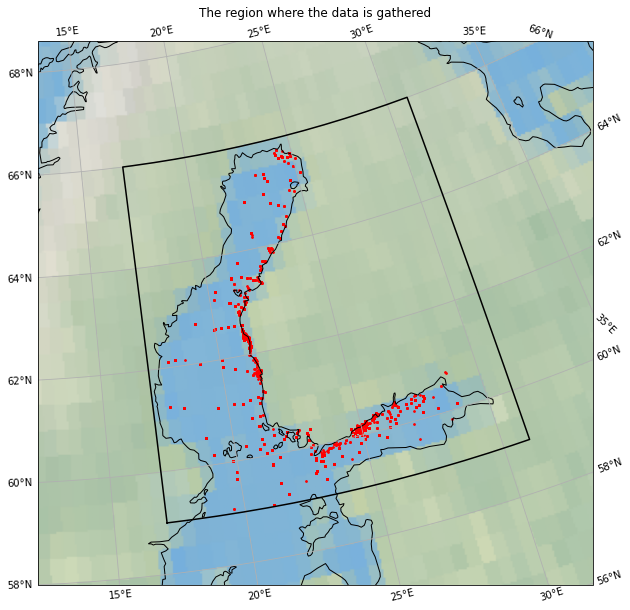

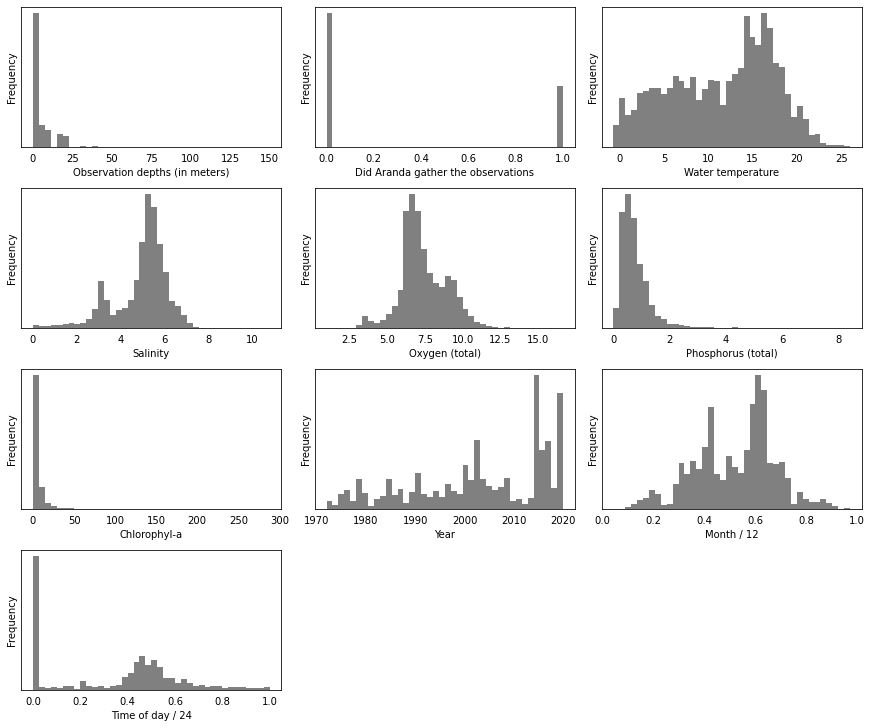

In [6]:
print("The minimums, medians and maximums of each feature and the measurements")
print(data_frame_numeric.describe())

# See the details of the plotting functions in
bounding_box = [17.0, 59.0, 31.0, 66.0] # From Lesson-1
plotting_utils.scatterplot_in_map(data_frame_numeric['LONGITUDE'], 
                                  data_frame_numeric['LATITUDE'], 
                                  bounding_box=bounding_box, 
                                  bounding_box_context=plotting_utils.BOUNDS_NORTHERN_BALTIC_SEA,
                                  c='red', s=3, title="The region where the data is gathered")

plotting_utils.plot_histograms(data_frame_numeric, 
                               plotted_columns=[('OBSDEP', "Observation depths (in meters)"),
                                                ('ARANDA', "Did Aranda gather the observations"),
                                                ('TEMP', "Water temperature"),
                                                ('SALIN', "Salinity"),
                                                ('TOTOXY', "Oxygen (total)"),
                                                ('TOTP', "Phosphorus (total)"),
                                                ('CHL', "Chlorophyl-a"),
                                                ('YEAR', "Year"),
                                                ('MONTHFRACTION', "Month / 12"),
                                                ('TIMEOFDAYFRACTION', "Time of day / 24")], ncols=3)

### Let us learn from what we just saw:

Based on the data ranges, it seems that the data is bounded as follows:
* latitude is unbounded, $(-\infty, \infty)$
* longitude is unbounded, $(-\infty, \infty)$
* observation depth is half bounded, $[0, \infty)$
* temperature in unbounded, $(-\infty, \infty)$
* salinity is positive, $(0, \infty)$
* total oxygen is positive, $(0, \infty)$
* total phosphor is half bounded, $[0, \infty)$
* total chlorophyl is half bounded, $[0, \infty)$
* Year, monthfraction and timefraction are as we defined them earlier

#### Then to the problems we see in the data:

First, the feature "observation depth" (OBSDEP) seems to mainly be less than 50 m, but there are some observations taken from deeper than that. It probably is correct, but from the perspective of the whole measurement history, it is an oddity (or outlier) and the algorithm is likely to perform better if these oddities are removed. 

In [7]:
# Remove "oddities" from observation depth:
data_frame_numeric = data_frame_numeric[data_frame_numeric['OBSDEP']<50]

Second, some "Chlorophyl-a" measurements are weirdly high, which is weird. It might be so that there is just an algae bloom. Let us first inspect the values before deciding what to do with them.

In [8]:
print("Number of weirdly high measurements:", data_frame_raw[data_frame_raw['CHL']>70].shape[0])
print("Statistics of other attributes:")
print(data_frame_numeric[data_frame_numeric['CHL']>70].describe())

Number of weirdly high measurements: 28
Statistics of other attributes:
        LATITUDE  LONGITUDE     OBSDEP       TEMP      SALIN     TOTOXY  \
count  28.000000  28.000000  28.000000  28.000000  28.000000  28.000000   
mean   60.331270  25.380371   0.296429   9.382143   3.332143  10.455000   
std     0.498404   1.298388   0.454999   4.156214   1.328818   3.274724   
min    60.133900  21.140370   0.000000   2.800000   0.150000   5.320000   
25%    60.176793  24.932008   0.000000   5.975000   3.055000   7.560000   
50%    60.200055  25.001415   0.000000   9.050000   3.685000  10.920000   
75%    60.273660  25.352795   1.000000  13.600000   4.205000  12.932500   
max    62.804480  28.763320   1.000000  17.200000   5.150000  16.660000   

            TOTP         CHL  ARANDA         YEAR  MONTHFRACTION  \
count  28.000000   28.000000    28.0    28.000000      28.000000   
mean    4.357321  117.817857     0.0  1999.321429       0.399832   
std     1.615556   54.116630     0.0     5.53141

The values seem to be perfectly normal, just very rare. It seems that the observations are made on the surface level (from depth 0-1m) and probably there just happened to be an algae bloom. However, even if the values are normal, they still are oddities and better to be removed when working with the traditional machine learning algorithms.

In [9]:
data_frame_numeric = data_frame_numeric[data_frame_numeric['CHL']<70]

And let us then visualize the distributions of the attributes which were manually dealth with

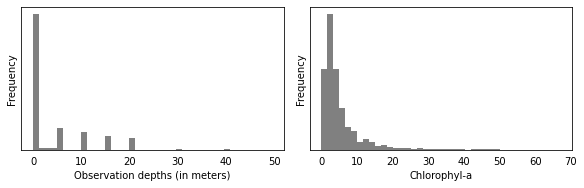

In [10]:
plotting_utils.plot_histograms(data_frame_numeric, 
                               plotted_columns=[('OBSDEP', "Observation depths (in meters)"),
                                                ('CHL', "Chlorophyl-a")], ncols=2)

Better!

There is one more weird thing in the data that we decide to do nothing with: abnormally many measurements are made exactly at midnight probably this just means that the observation time was not recorded or it doesn't matter. Let us inspect these data bit more deeply:

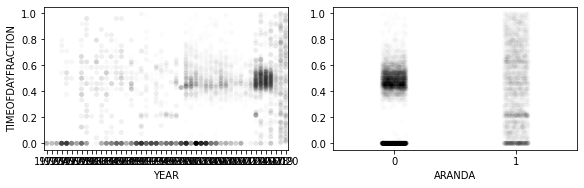

In [11]:
plotting_utils.plot_class_marginals(data_frame_numeric, 'TIMEOFDAYFRACTION', 
                                    plotted_columns=[('YEAR', 'Year'), ('ARANDA','Ship')], 
                                    flip_xy=True, color='k', alpha=0.01, ncols=2)

Ok, it seems that the measurement time is now-a-days recorded more thoroughly than before. Also, it seems that "Unknown" ship mainly measures during office hours whereas "Aranda" measures more throughout the day.

Let us leave the feature it as it is but acknowledge that it might cause some problems in the future that some data is missing.

### The next step is to transform and normalize the data

In [12]:
# SALIN and TOTOXY are positive, (0, \infty), so we want to log transform them:
data_frame_numeric['LOGSALIN'] = np.log(data_frame_numeric['SALIN'])
data_frame_numeric['LOGTOTOXY'] = np.log(data_frame_numeric['TOTOXY'])

# "a hack" to make periodic data to be modellable 
data_frame_numeric['SINMONTHFRACTION'] = np.sin(data_frame_numeric['MONTHFRACTION']*2*np.pi)
data_frame_numeric['COSMONTHFRACTION'] = np.cos(data_frame_numeric['MONTHFRACTION']*2*np.pi)

data_frame_numeric['SINTIMEOFDAYFRACTION'] = np.sin(data_frame_numeric['TIMEOFDAYFRACTION']*2*np.pi)
data_frame_numeric['COSTIMEOFDAYFRACTION'] = np.cos(data_frame_numeric['TIMEOFDAYFRACTION']*2*np.pi)

# SCALING COLUMNS
# All but columns "ARANDA", "MONTFRACTION" and "TIMEOFDAYFRACTION" are numeric and non periodic and need to be transformed:
normalized_columns = ["LATITUDE", "LONGITUDE", "OBSDEP", "TEMP", "LOGSALIN", "LOGTOTOXY", "TOTP", "CHL", "YEAR"]
normalizer = sklearn.preprocessing.StandardScaler()

data_frame_normalized = data_frame_numeric.copy()
data_frame_normalized[normalized_columns] = normalizer.fit_transform(data_frame_numeric[normalized_columns])
data_frame_normalized = data_frame_normalized.drop(['SALIN', 'TOTOXY'], axis=1)

print(data_frame_normalized.head())

     LATITUDE  LONGITUDE    OBSDEP      TEMP      TOTP       CHL  ARANDA  \
500 -1.046163  -0.086677 -0.509738 -1.687906  0.111921 -0.716905       0   
501 -1.046163  -0.086677  0.807186 -1.687906  0.430116 -0.687984       0   
510 -1.046163  -0.086677 -0.509738 -1.979352 -0.078603 -0.687984       0   
511 -1.046163  -0.086677  0.807186 -1.979352 -0.013786 -0.745827       0   
512 -1.046163  -0.086677  5.196933 -1.910776 -0.394834 -0.774748       0   

         YEAR  MONTHFRACTION  TIMEOFDAYFRACTION  LOGSALIN  LOGTOTOXY  \
500 -2.085216       0.169750                0.0  0.832934   0.927209   
501 -2.085216       0.169750                0.0  0.832934   0.852926   
510 -2.011403       0.191653                0.0  0.900646   1.383077   
511 -2.011403       0.191653                0.0  0.949342   1.315791   
512 -2.011403       0.191653                0.0  1.020581   1.143184   

     SINMONTHFRACTION  COSMONTHFRACTION  SINTIMEOFDAYFRACTION  \
500          0.875550          0.483128      

### Last we save the data, normalizer and columns so that we can avoid the retrieving and preprocessing phases

In [13]:
dictionary_data = {"data_frame_numeric": data_frame_numeric, 
                   "normalizer": normalizer, 
                   "normalized_columns": normalized_columns}
with open('datasets/water_quality.pkl', "wb") as handle:
    pickle.dump(dictionary_data, handle)

Aaaaand we are done with the preprocessing of the data! Nice!

### Now it is your turn. Preprocess the "ice thickness data" acquired in Lesson 1, and save it to 'datasets/ice_thickness.pkl' similarly as we saved water quality data

Use column names "LATITUDE", "LONGITUDE", "YEAR", "MONTHFRACTION", "TIMEOFDAYFRACTION", and "THICKNESS", and periodic derivatives "SIN{name}" and "COS{name}" for future compatibility

In [14]:
#INSERT YOUR CODE HERE
#data_frame_raw_ice_thickness = pd.read_pickle("datasets/ice_thickness_pandas_raw.pkl")

### No need to go through the code below in detail, here we preprocess "mammographic screening data" that can be used to predict cancer and to be used for classification methods later

Details of the data are [here](https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass). We have already downloaded the data to the "datasets"-folder.

#### Attribute Information:
6 Attributes in total (1 goal field, 1 non-predictive, 4 predictive attributes)

1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive! A Human expert is used to make the assessment), the larger the value, the more likely the human expert thinks that there is 
2. AGE: patient's age in years (integer)
3. SHAPE: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. MARGIN: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. DENSITY: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. SEVERITY: benign=0 or malignant=1 (binominal, goal field!) 

First, visualize the data. We show here two alternative ways:
* In scatterplot we visualize the two different classes in a scatterplot
* In bar/distribution plot we visualize the marginal distributions of the different classes as barcharts (discrete variables) or distribution estimates (obtained with kernel density estimation)

          BI-RADS         AGE       SHAPE      MARGIN     DENSITY    SEVERITY
count  958.000000  955.000000  929.000000  912.000000  884.000000  960.000000
mean     4.295407   55.475393    2.721206    2.793860    2.910633    0.462500
std      0.706293   14.482917    1.243428    1.565702    0.380647    0.498852
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max      6.000000   96.000000    4.000000    5.000000    4.000000    1.000000


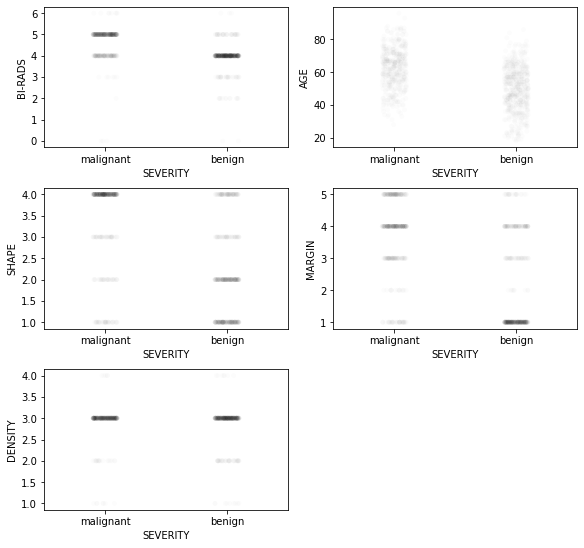

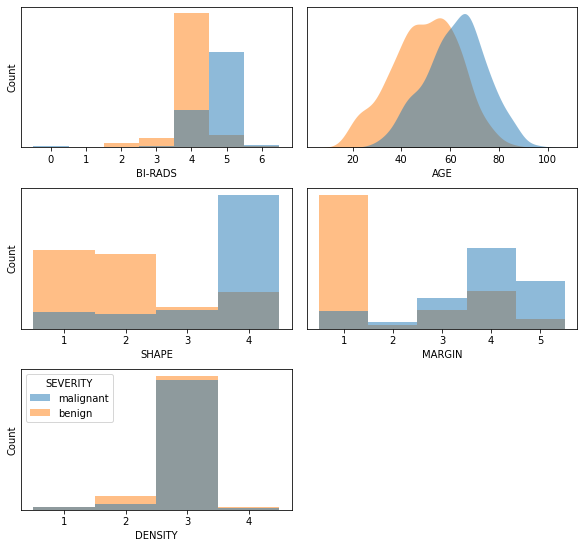

In [15]:
data_frame_mammo = pd.read_csv('datasets/mammographic_masses.data', na_values='?')
columns = ["BI-RADS", "AGE", "SHAPE", "MARGIN", "DENSITY", "SEVERITY"]
data_frame_mammo.columns = columns

#Let us see how the data looks:
print(data_frame_mammo.describe())

data_ = data_frame_mammo.copy()
data_['SEVERITY'] = data_['SEVERITY'].replace({0:"benign", 1:"malignant"})
plotting_utils.plot_class_marginals(data_, 'SEVERITY', color='k', alpha=0.01, ncols=2)

plotting_utils.plot_class_kdes(data_, 'SEVERITY', ncols=2)

Let us transform AGE to logarithmic scale and SHAPE and MARGIN to one-hot vectors and let rest of the variables to be as they are ordinal

In [16]:
log_transformed = ['AGE']
data_frame_mammo_numeric = data_frame_mammo.copy()
for column in log_transformed:
    data_frame_mammo_numeric['LOG'+column] = np.log(data_frame_mammo[column])

data_frame_mammo_numeric[["ROUND", "OVAL", "LOBURAL", "IRREGULAR"]] = pd.get_dummies(data_frame_mammo_numeric['SHAPE'])

data_frame_mammo_numeric[["CIRCUMSCRIBED", "MICROLOBULATED", "OBSCURED", "ILL-DEFINED", "SPICULATED"]] = pd.get_dummies(data_frame_mammo_numeric['MARGIN'])

data_frame_mammo_numeric = data_frame_mammo_numeric.drop(log_transformed+['SHAPE', 'MARGIN'], axis=1)
data_frame_mammo_numeric.head()

,BI-RADS,DENSITY,SEVERITY,LOGAGE,ROUND,OVAL,LOBURAL,IRREGULAR,CIRCUMSCRIBED,MICROLOBULATED,OBSCURED,ILL-DEFINED,SPICULATED
0,4.0,NaN,1,3.761200,1,0,0,0,1,0,0,0,0
1,5.0,3.0,1,4.060443,0,0,0,1,0,0,0,0,1
2,4.0,3.0,0,3.332205,1,0,0,0,1,0,0,0,0
3,5.0,NaN,1,4.304065,1,0,0,0,0,0,0,0,1
4,4.0,3.0,0,4.174387,1,0,0,0,0,0,0,0,0


The data seems to be missing values so we need to decide what to do about it, let us use k-nearest neigbours for inputation. k-nearest neigbours method is covered later, but take a look at [here](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) if you want to sneak peek already now. In practice in inputation we take all but the missing feature and find the k-nearest neigbours based on those features and use their features to input the missing values.

In [17]:
inputed_columns = [col for col in data_frame_mammo_numeric.columns if col not in ['SEVERITY', 'BI-RADS']]
#Some values are missing, let us use nearest neigbor inputation:
inputer = sklearn.impute.KNNImputer(n_neighbors=1)
data_frame_mammo_numeric[inputed_columns] = inputer.fit_transform(data_frame_mammo_numeric[inputed_columns])

And then fit the normalizer for the data

In [18]:
normalized_columns = ["LOGAGE", "DENSITY"]
normalizer = sklearn.preprocessing.StandardScaler()
data_frame_mammo_normalized = data_frame_mammo_numeric.copy()
data_frame_mammo_normalized[normalized_columns] = normalizer.fit_transform(data_frame_mammo_numeric[normalized_columns])

And save

In [19]:
dictionary_data = {"data_frame_numeric": data_frame_mammo_numeric, 
                   "normalizer": normalizer, 
                   "normalized_columns": normalized_columns}
with open('datasets/mammographic.pkl', "wb") as handle:
    pickle.dump(dictionary_data, handle)